# Explore here

In [167]:
!pip install -r "/workspaces/RF/requirements.txt"


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

from IPython.display import Image
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_percentage_error, f1_score, accuracy_score, make_scorer
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import export_graphviz

In [169]:
url = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
df = pd.read_csv(url)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [170]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [171]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

[Text(0.4527730855855856, 0.9642857142857143, 'BMI <= 29.15\ngini = 0.449\nsamples = 383\nvalue = [405, 209]\nclass = 0'),
 Text(0.17004504504504506, 0.8928571428571429, 'DiabetesPedigreeFunction <= 1.12\ngini = 0.186\nsamples = 150\nvalue = [224, 26]\nclass = 0'),
 Text(0.3114090653153153, 0.9285714285714286, 'True  '),
 Text(0.08783783783783784, 0.8214285714285714, 'Age <= 27.5\ngini = 0.165\nsamples = 144\nvalue = [220, 22]\nclass = 0'),
 Text(0.018018018018018018, 0.75, 'BMI <= 22.75\ngini = 0.041\nsamples = 82\nvalue = [142, 3]\nclass = 0'),
 Text(0.009009009009009009, 0.6785714285714286, 'gini = 0.0\nsamples = 25\nvalue = [51, 0]\nclass = 0'),
 Text(0.02702702702702703, 0.6785714285714286, 'DiabetesPedigreeFunction <= 0.396\ngini = 0.062\nsamples = 57\nvalue = [91.0, 3.0]\nclass = 0'),
 Text(0.018018018018018018, 0.6071428571428571, 'gini = 0.0\nsamples = 34\nvalue = [54, 0]\nclass = 0'),
 Text(0.036036036036036036, 0.6071428571428571, 'DiabetesPedigreeFunction <= 0.405\ngini = 0

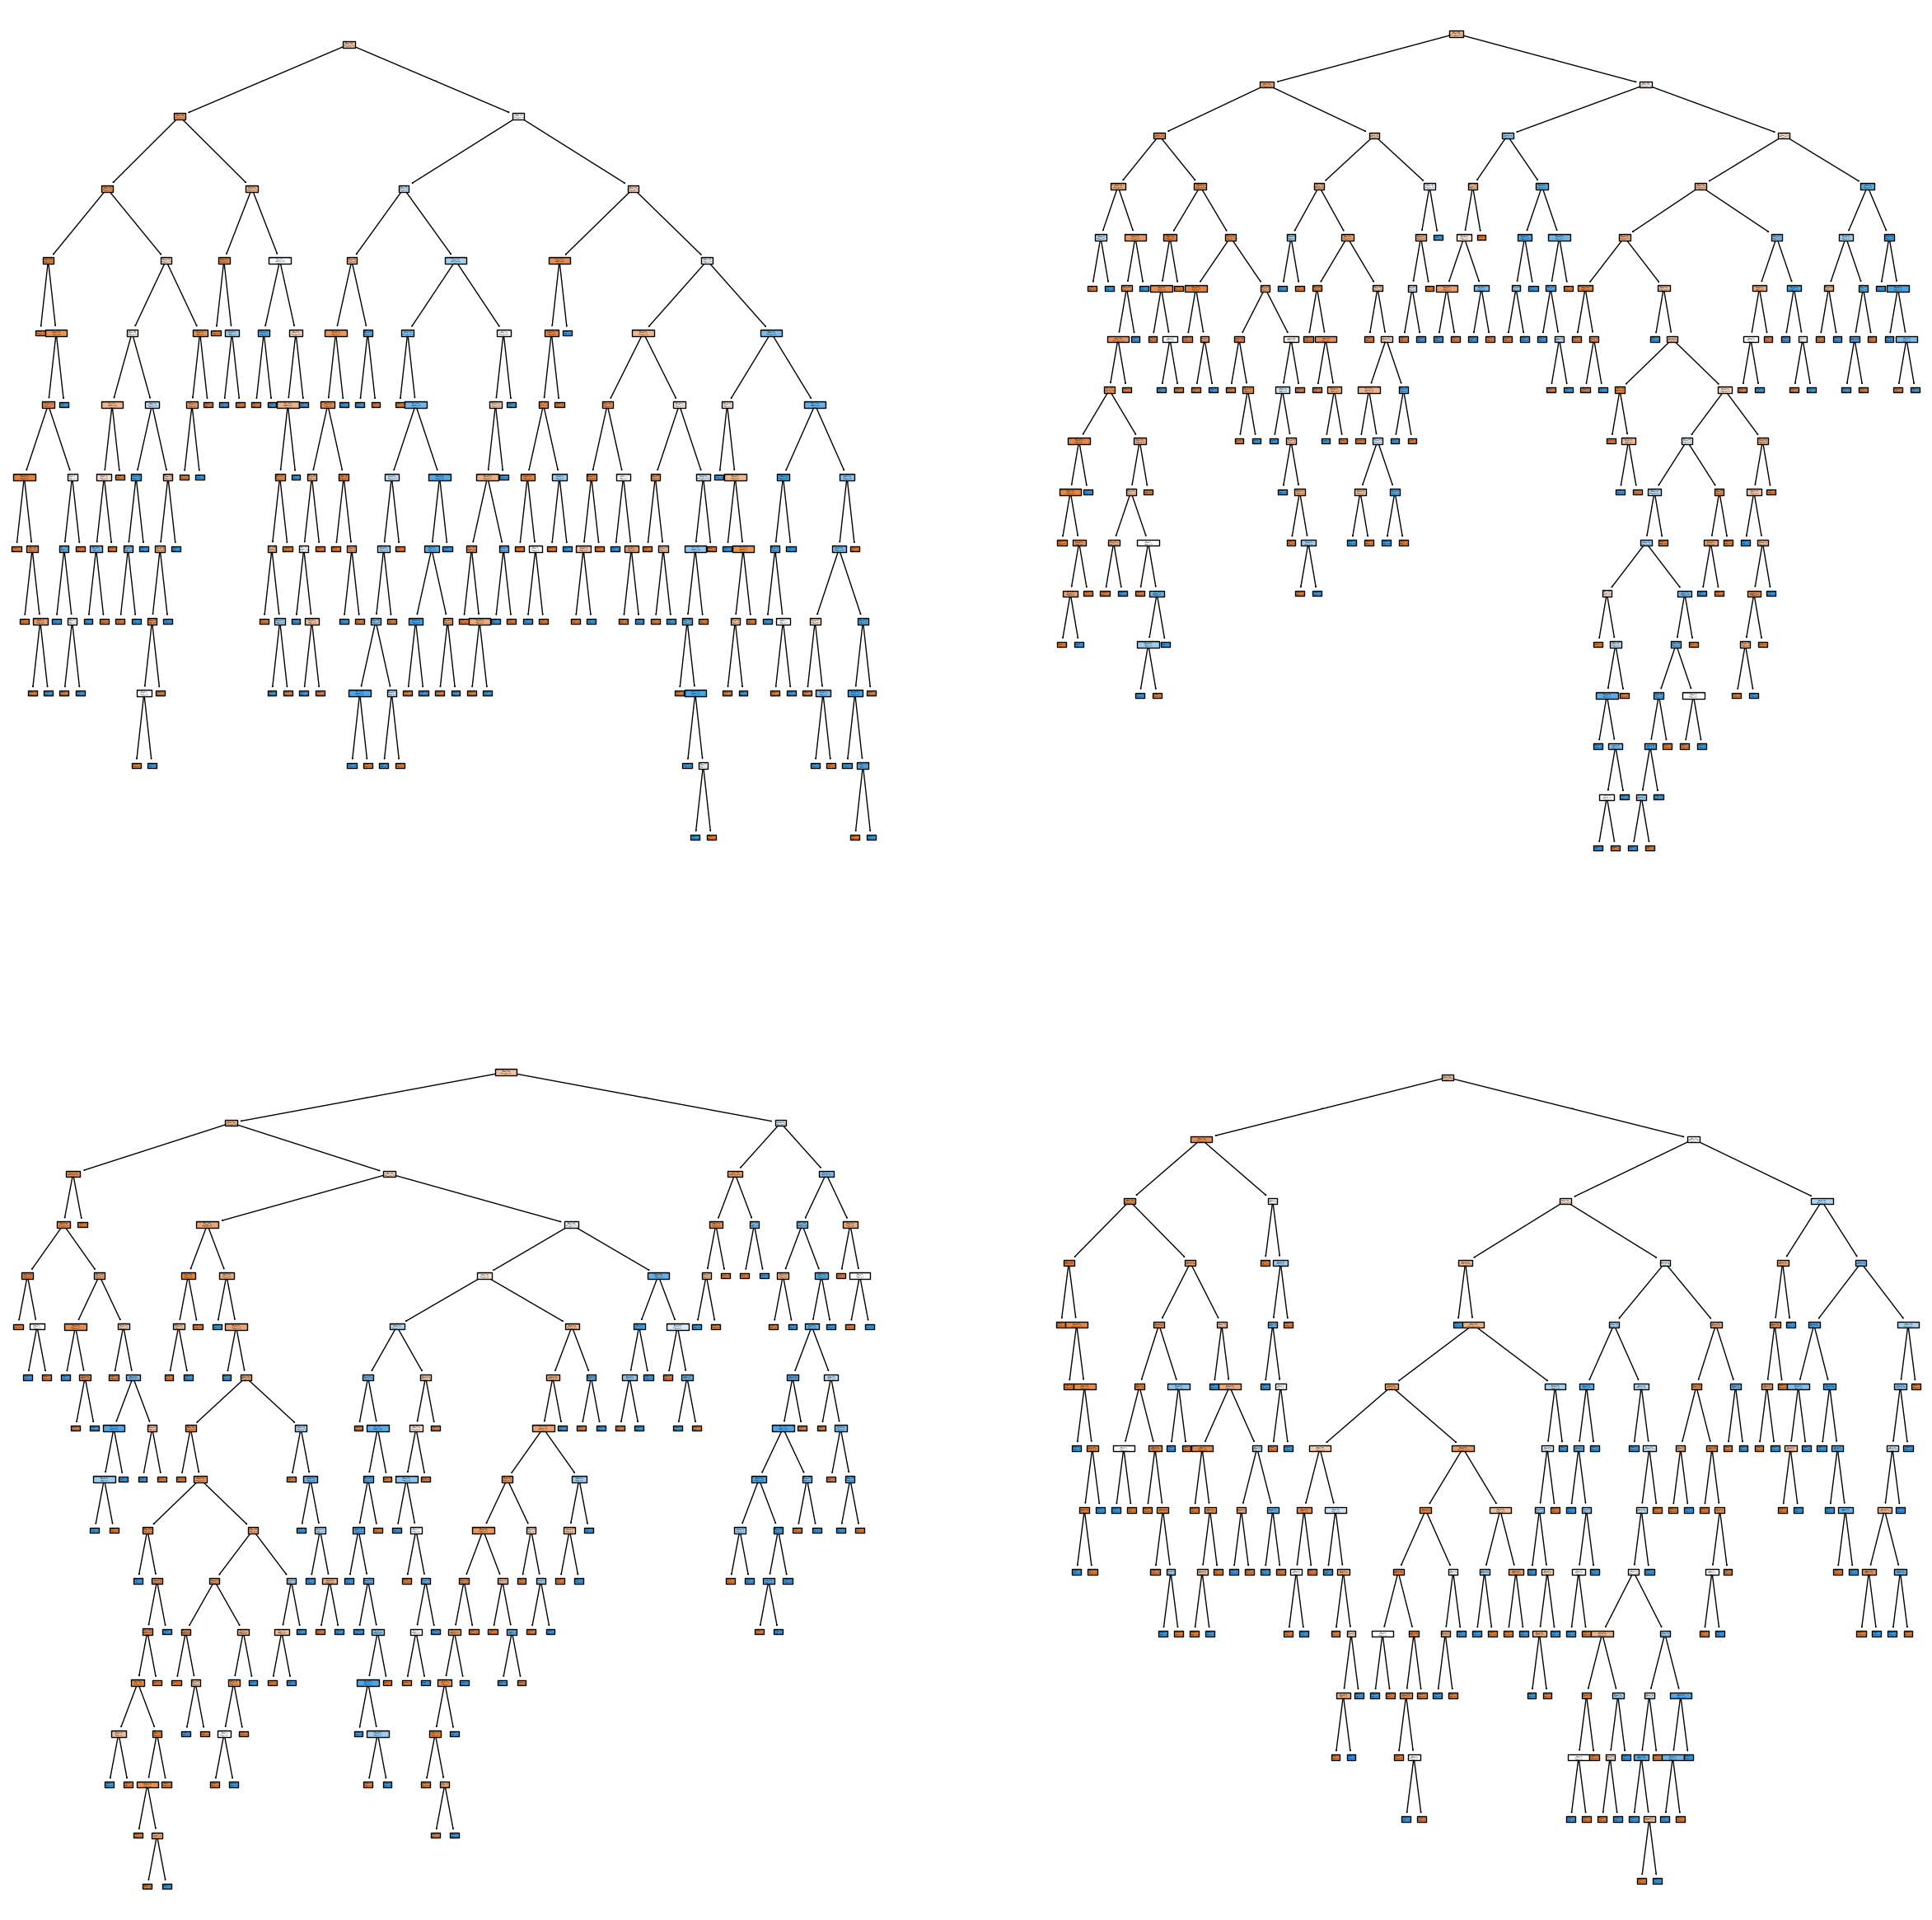

In [172]:
fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(model.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(model.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

In [173]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [174]:
y_train_pred = model.predict(X_train)
y_train_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [175]:
accuracy_score(y_test, y_pred)

0.7207792207792207

In [176]:
accuracy_score(y_train, y_train_pred)

1.0

In [177]:
f1_score(y_test, y_pred)

np.float64(0.6126126126126126)

In [178]:
f1_score(y_train, y_train_pred)

np.float64(1.0)

In [179]:
parameters = {
              'max_depth':[3,4,5],
              'min_samples_split':[2,3,4,5],
              'min_samples_leaf':[1,2,3,4],
              'criterion' : ['gini','entropy'],
              'n_estimators': [20,50],
              'max_features': [3,4,5,6,7]
             }

Rand_SearchCV = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), parameters, cv=5)
random_out = Rand_SearchCV.fit(X_train, y_train)
Rand_SearchCV.fit(X_train, y_train)

print(f"Best parameters: {Rand_SearchCV.best_params_}")

Best parameters: {'n_estimators': 20, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 7, 'max_depth': 5, 'criterion': 'entropy'}


In [180]:
best = random_out.best_estimator_
best

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=7,
                       min_samples_leaf=3, min_samples_split=5, n_estimators=20,
                       n_jobs=-1)

In [181]:
y_train_pred = best.predict(X_train)
y_train_pred

array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,

In [182]:
y_test_pred = best.predict(X_test)
y_test_pred

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [183]:
accuracy_score(y_train, y_train_pred)

0.8631921824104235

In [184]:
accuracy_score(y_test, y_pred)

0.7207792207792207

In [185]:
f1_score(y_test, y_pred)

np.float64(0.6126126126126126)

In [186]:
f1_score(y_train, y_train_pred)

np.float64(0.7980769230769231)

[Text(0.4880952380952381, 0.9166666666666666, 'Glucose <= 128.5\nentropy = 0.943\nsamples = 387\nvalue = [393.0, 221.0]\nclass = 0'),
 Text(0.16666666666666666, 0.75, 'BMI <= 27.35\nentropy = 0.688\nsamples = 246\nvalue = [320, 72]\nclass = 0'),
 Text(0.3273809523809524, 0.8333333333333333, 'True  '),
 Text(0.047619047619047616, 0.5833333333333334, 'Pregnancies <= 2.5\nentropy = 0.153\nsamples = 82\nvalue = [133, 3]\nclass = 0'),
 Text(0.023809523809523808, 0.4166666666666667, 'entropy = 0.0\nsamples = 49\nvalue = [80, 0]\nclass = 0'),
 Text(0.07142857142857142, 0.4166666666666667, 'Age <= 29.5\nentropy = 0.301\nsamples = 33\nvalue = [53, 3]\nclass = 0'),
 Text(0.047619047619047616, 0.25, 'DiabetesPedigreeFunction <= 0.295\nentropy = 0.559\nsamples = 13\nvalue = [20, 3]\nclass = 0'),
 Text(0.023809523809523808, 0.08333333333333333, 'entropy = 0.0\nsamples = 9\nvalue = [17, 0]\nclass = 0'),
 Text(0.07142857142857142, 0.08333333333333333, 'entropy = 1.0\nsamples = 4\nvalue = [3, 3]\nclas

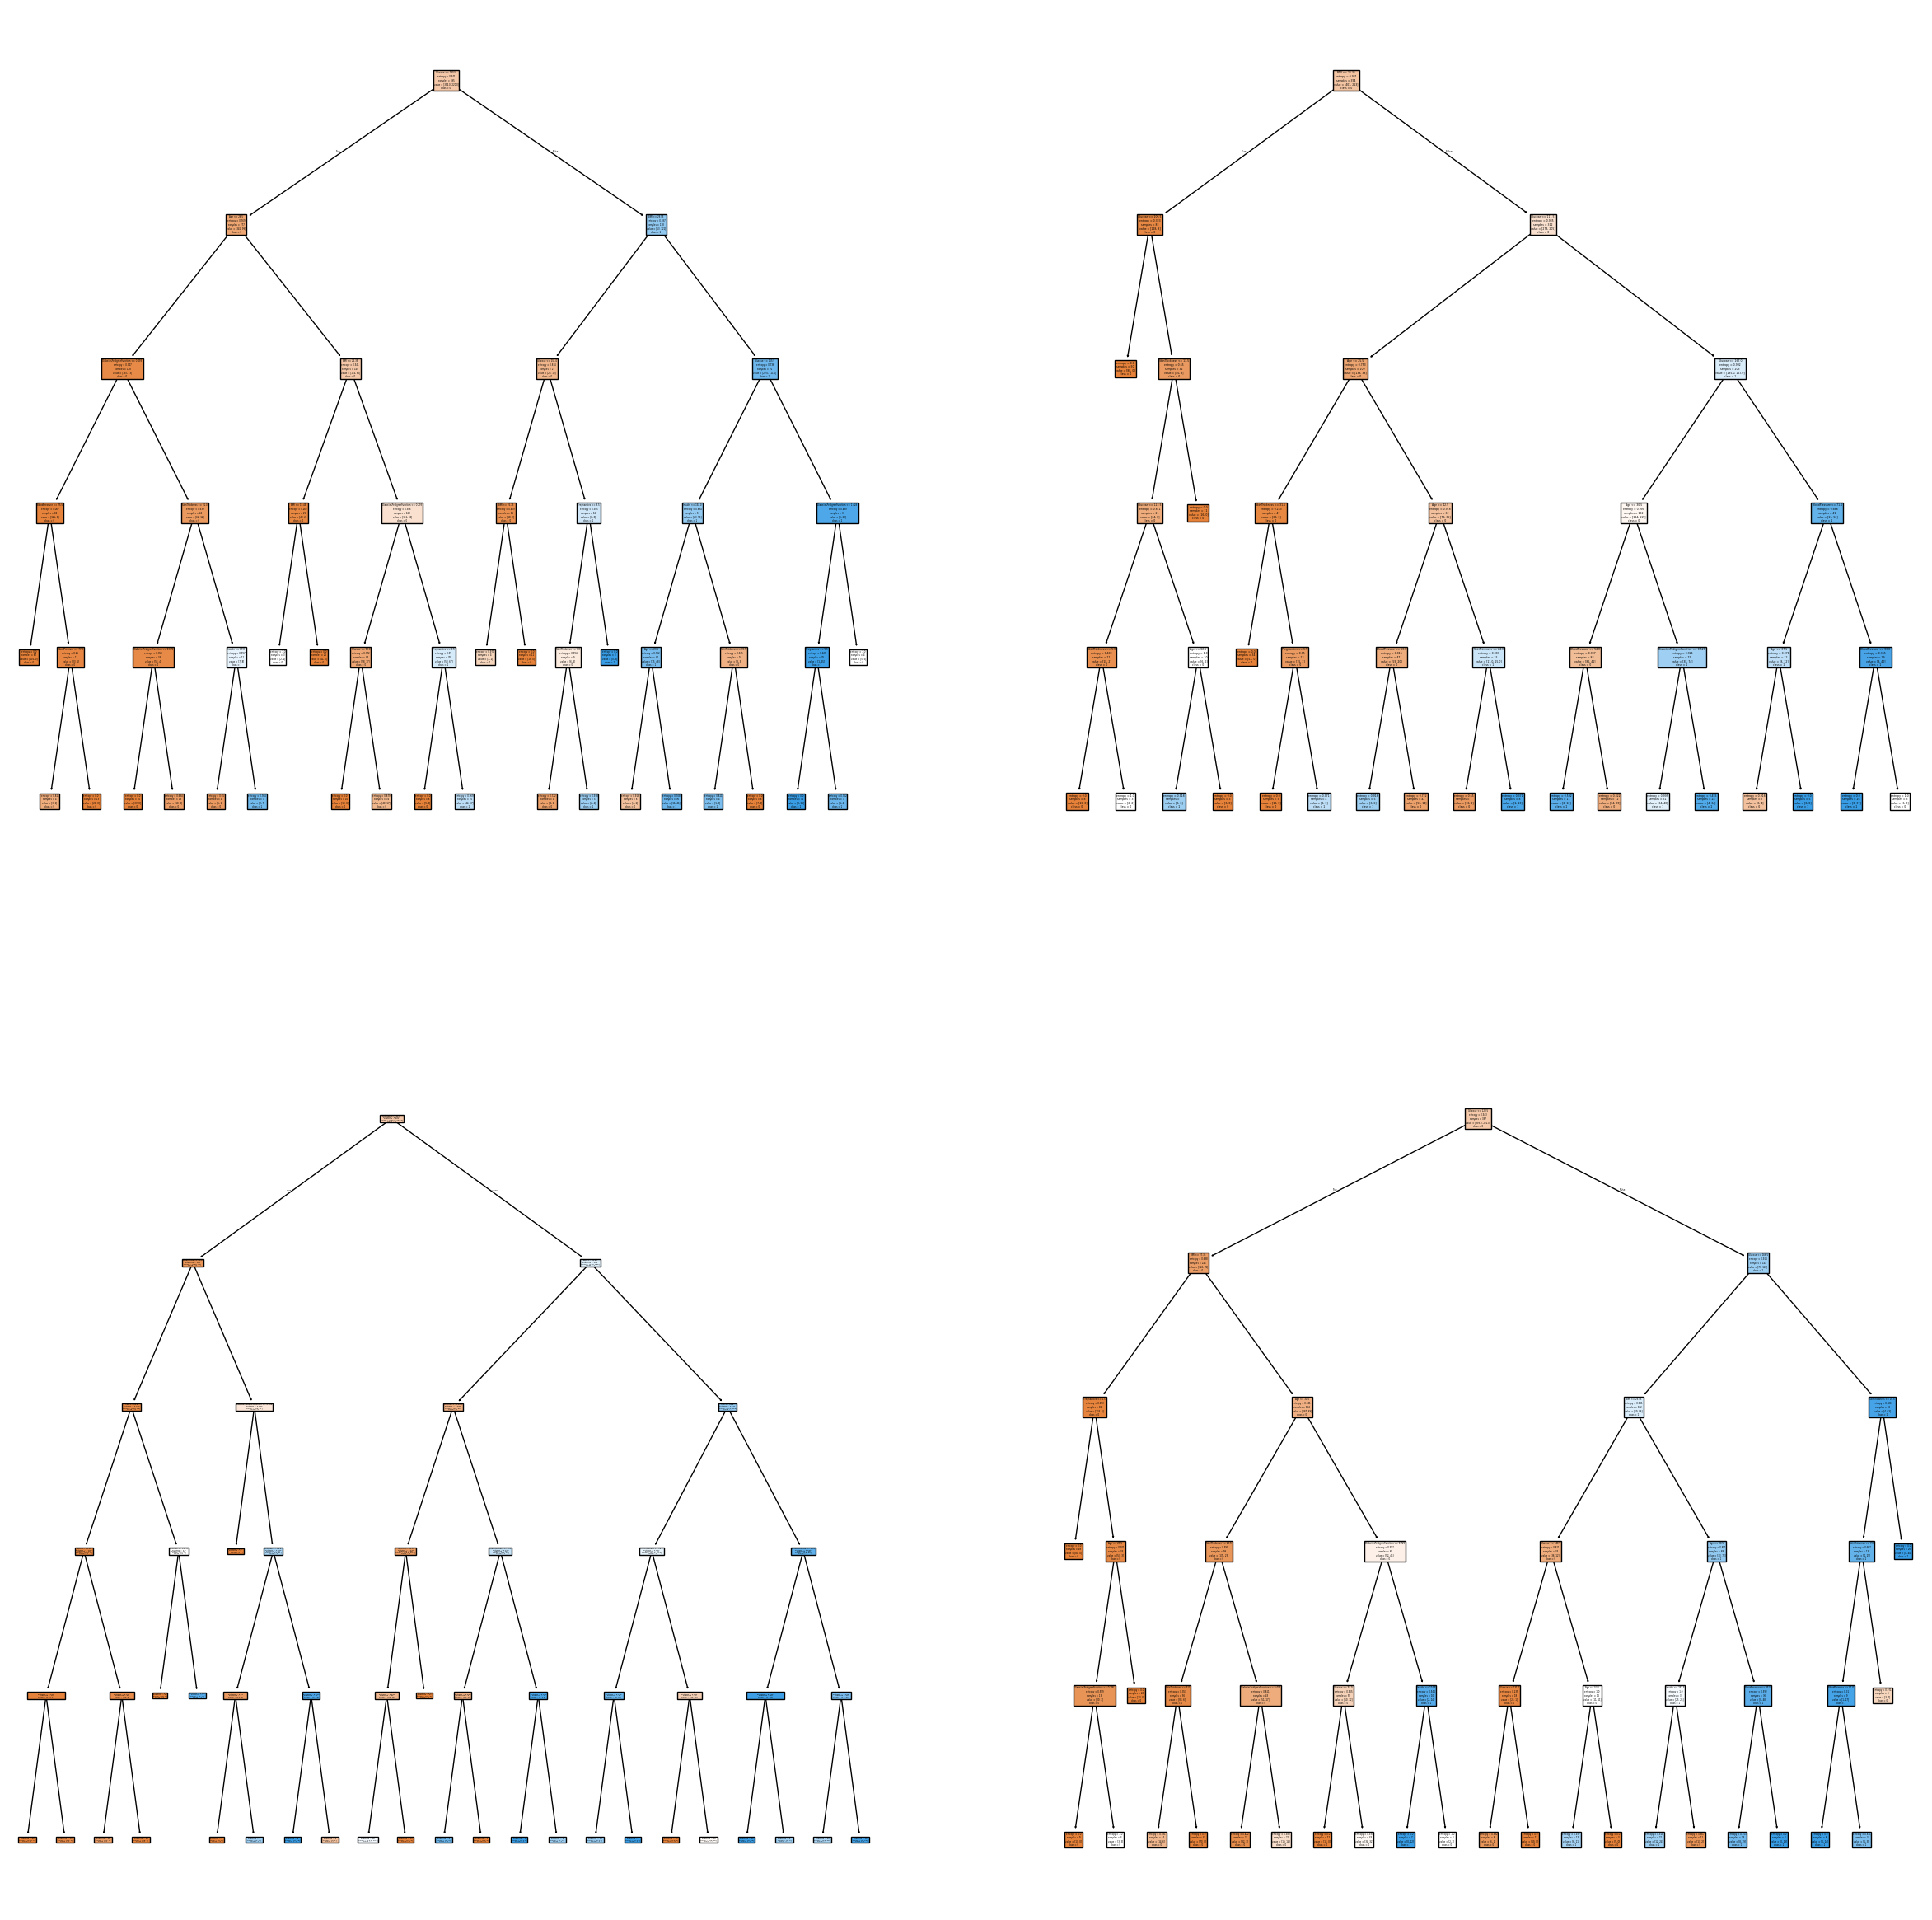

In [187]:
fig, axis = plt.subplots(2, 2, figsize = (30, 30))

# We show the first 4 trees out of the 100 generated (default)
tree.plot_tree(best.estimators_[0], ax = axis[0, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[1], ax = axis[0, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[2], ax = axis[1, 0], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)
tree.plot_tree(best.estimators_[3], ax = axis[1, 1], feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)